In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2024-01-24 09:10:29--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.207, 74.125.20.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   240MB/s    in 0.6s    

2024-01-24 09:10:30 (240 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
!unzip /content/horse-or-human.zip

Archive:  /content/horse-or-human.zip
  inflating: horses/horse01-0.png    
  inflating: horses/horse01-1.png    
  inflating: horses/horse01-2.png    
  inflating: horses/horse01-3.png    
  inflating: horses/horse01-4.png    
  inflating: horses/horse01-5.png    
  inflating: horses/horse01-6.png    
  inflating: horses/horse01-7.png    
  inflating: horses/horse01-8.png    
  inflating: horses/horse01-9.png    
  inflating: horses/horse02-0.png    
  inflating: horses/horse02-1.png    
  inflating: horses/horse02-2.png    
  inflating: horses/horse02-3.png    
  inflating: horses/horse02-4.png    
  inflating: horses/horse02-5.png    
  inflating: horses/horse02-6.png    
  inflating: horses/horse02-7.png    
  inflating: horses/horse02-8.png    
  inflating: horses/horse02-9.png    
  inflating: horses/horse03-0.png    
  inflating: horses/horse03-1.png    
  inflating: horses/horse03-2.png    
  inflating: horses/horse03-3.png    
  inflating: horses/horse03-4.png    
  inflating:

In [ ]:
import zipfile
zipref=zipfile.ZipFile(r'horse-or-human.zip')
zipref.extractall('./horse-or-human')
zipref.close()

In [ ]:
import os
# Directory with our training horse pictures
train_horse_dir=os.path.join('./horse-or-human/horses')
# Directory with our training human pictures
train_humans_dir=os.path.join('./horse-or-human/humans')

In [ ]:
train_humans_dir

'./horse-or-human/humans'

In [ ]:
train_horse_names=os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names=os.listdir(train_humans_dir)
print(train_human_names[:10])

['horse25-8.png', 'horse36-1.png', 'horse23-6.png', 'horse02-5.png', 'horse24-0.png', 'horse18-3.png', 'horse26-0.png', 'horse35-8.png', 'horse22-4.png', 'horse09-0.png']
['human14-17.png', 'human03-10.png', 'human13-09.png', 'human03-28.png', 'human04-06.png', 'human03-11.png', 'human14-08.png', 'human09-27.png', 'human15-29.png', 'human05-04.png']


In [ ]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_humans_dir)))

total training horse images: 500
total training human images: 527


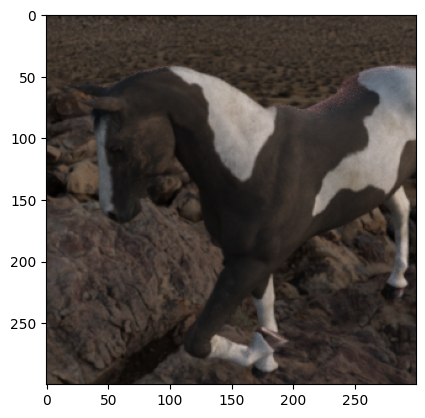

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
first=os.path.join(train_horse_dir, train_horse_names[0])
img = mpimg.imread(first)
plt.imshow(img)

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

In [ ]:
[1,2,3]+[4,5,6]

[1, 2, 3, 4, 5, 6]

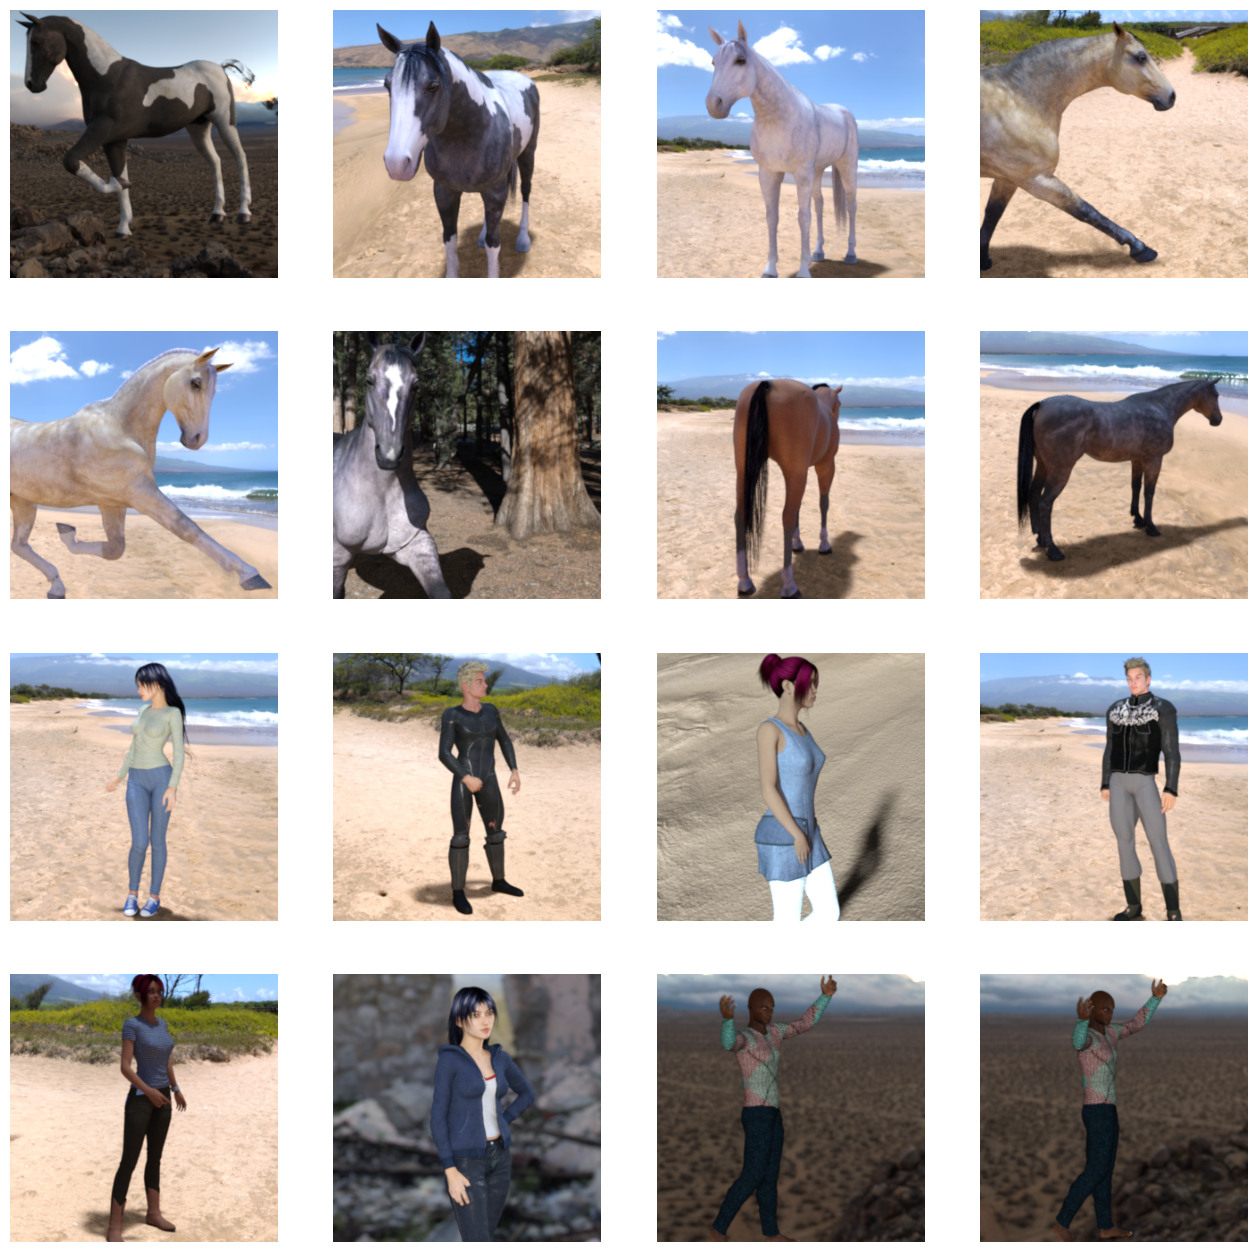

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_humans_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(60, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(40, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(30, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(30, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    #tf.keras.layers.Conv2D(, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [ ]:
#from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
from tensorflow import keras

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',rescale=1/255,validation_split=0.2)
train_generator=train_datagen.flow_from_directory(
    './horse-or-human',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary',
    subset="training"
)

Found 822 images belonging to 2 classes.


In [ ]:
test_generator=train_datagen.flow_from_directory(
    './horse-or-human',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary',
    subset="validation"
)

Found 205 images belonging to 2 classes.


In [ ]:
x_train,y_train=next(train_generator)

In [ ]:
y_train.shape

(128,)

In [ ]:
x_test,y_test=next(test_generator)

In [ ]:
history = model.fit(
      train_generator,
      epochs=20,
      verbose=1,validation_data=test_generator)

Epoch 1/20
7/7 [==============================] - 47s 5s/step - loss: 0.7342 - accuracy: 0.4793 - val_loss: 0.6938 - val_accuracy: 0.5317
Epoch 2/20
7/7 [==============================] - 29s 4s/step - loss: 0.6805 - accuracy: 0.5560 - val_loss: 0.7023 - val_accuracy: 0.4732
Epoch 3/20
7/7 [==============================] - 26s 4s/step - loss: 0.6465 - accuracy: 0.6557 - val_loss: 0.7583 - val_accuracy: 0.4878
Epoch 4/20
7/7 [==============================] - 28s 4s/step - loss: 0.5838 - accuracy: 0.6776 - val_loss: 0.6308 - val_accuracy: 0.5902
Epoch 5/20
7/7 [==============================] - 27s 4s/step - loss: 0.4895 - accuracy: 0.7822 - val_loss: 0.7703 - val_accuracy: 0.5805
Epoch 6/20
7/7 [==============================] - 28s 4s/step - loss: 0.5249 - accuracy: 0.7251 - val_loss: 0.5040 - val_accuracy: 0.7317
Epoch 7/20
7/7 [==============================] - 27s 4s/step - loss: 0.4476 - accuracy: 0.7871 - val_loss: 0.5176 - val_accuracy: 0.7171
Epoch 8/20
7/7 [==================

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
  print(fn)
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))

  x = img_to_array(img)
  x /= 255
  print(f"shape of image:{x.shape}")
  x = np.expand_dims(x, axis=0)
  #print(x)
  images = np.vstack([x])
  #print(images)
  classes = model.predict(images, batch_size=10)
  print(classes)
  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving entrepreneur-593358_640.jpg to entrepreneur-593358_640.jpg
Saving anime-3773979_640.png to anime-3773979_640.png
Saving horse-3390256_640.jpg to horse-3390256_640.jpg
Saving horse-561221_640.jpg to horse-561221_640.jpg
entrepreneur-593358_640.jpg
shape of image:(300, 300, 3)
1/1 [==============================] - 0s 443ms/step
[[0.50755423]]
[0.50755423]
entrepreneur-593358_640.jpg is a human
anime-3773979_640.png
shape of image:(300, 300, 3)
1/1 [==============================] - 0s 18ms/step
[[0.5075553]]
[0.5075553]
anime-3773979_640.png is a human
horse-3390256_640.jpg
shape of image:(300, 300, 3)
1/1 [==============================] - 0s 18ms/step
[[0.50755423]]
[0.50755423]
horse-3390256_640.jpg is a human
horse-561221_640.jpg
shape of image:(300, 300, 3)
1/1 [==============================] - 0s 19ms/step
[[0.50755423]]
[0.50755423]
horse-561221_640.jpg is a human


In [ ]:
#transfer learning model
from keras.applications import EfficientNetB4

In [ ]:
base_model=EfficientNetB4(
    include_top=False,
    weights="imagenet",
    pooling="avg",
    input_shape=(300,300,3)
)

In [ ]:
for layer in base_model.layers:
  layer.trainable=False

In [ ]:
from keras import regularizers

In [ ]:
model=keras.Sequential([base_model,
                        keras.layers.Dense(100,activation="relu",kernel_regularizer=keras.regularizers.L1(0.02)),
                        keras.layers.Dense(50,activation="relu",kernel_regularizer=keras.regularizers.L1(0.02)),
                        keras.layers.Dense(1,activation="sigmoid")
                        ])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional  (None, 1792)              17673823  
 )                                                               
                                                                 
 dense_3 (Dense)             (None, 100)               179300    
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 17858224 (68.12 MB)
Trainable params: 184401 (720.32 KB)
Non-trainable params: 17673823 (67.42 MB)
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      epochs=20,
      verbose=1,validation_data=test_generator)

Epoch 1/20
7/7 [==============================] - 51s 5s/step - loss: 100.2688 - accuracy: 0.5134 - val_loss: 87.8570 - val_accuracy: 0.5122
Epoch 2/20
7/7 [==============================] - 29s 4s/step - loss: 79.5889 - accuracy: 0.5182 - val_loss: 67.3498 - val_accuracy: 0.5122
Epoch 3/20
7/7 [==============================] - 30s 4s/step - loss: 59.8879 - accuracy: 0.5255 - val_loss: 49.9884 - val_accuracy: 0.5122
Epoch 4/20
7/7 [==============================] - 29s 4s/step - loss: 44.1407 - accuracy: 0.5024 - val_loss: 35.6487 - val_accuracy: 0.5122
Epoch 5/20
7/7 [==============================] - 30s 4s/step - loss: 30.4167 - accuracy: 0.5097 - val_loss: 24.3328 - val_accuracy: 0.5122
Epoch 6/20
2/7 [=======>......................] - ETA: 17s - loss: 23.6508 - accuracy: 0.4297

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
  print(fn)
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))

  x = img_to_array(img)
  x /= 255
  print(f"shape of image:{x.shape}")
  x = np.expand_dims(x, axis=0)
  #print(x)
  images = np.vstack([x])
  #print(images)
  classes = model.predict(images, batch_size=10)
  print(classes)
  print(classes[0])

Saving horse-561221_640.jpg to horse-561221_640 (1).jpg
horse-561221_640 (1).jpg
shape of image:(300, 300, 3)
1/1 [==============================] - 0s 157ms/step
[[-0.09604555  0.09024832 -0.11438389 ... -0.17374106 -0.19344954
  -0.13107847]]
[-0.09604555  0.09024832 -0.11438389 ... -0.17374106 -0.19344954
 -0.13107847]


In [ ]:
classes.shape

(1, 1792)

In [ ]:
import numpy as np
np.argmax(classes[0])

1187